# Plot the distribution

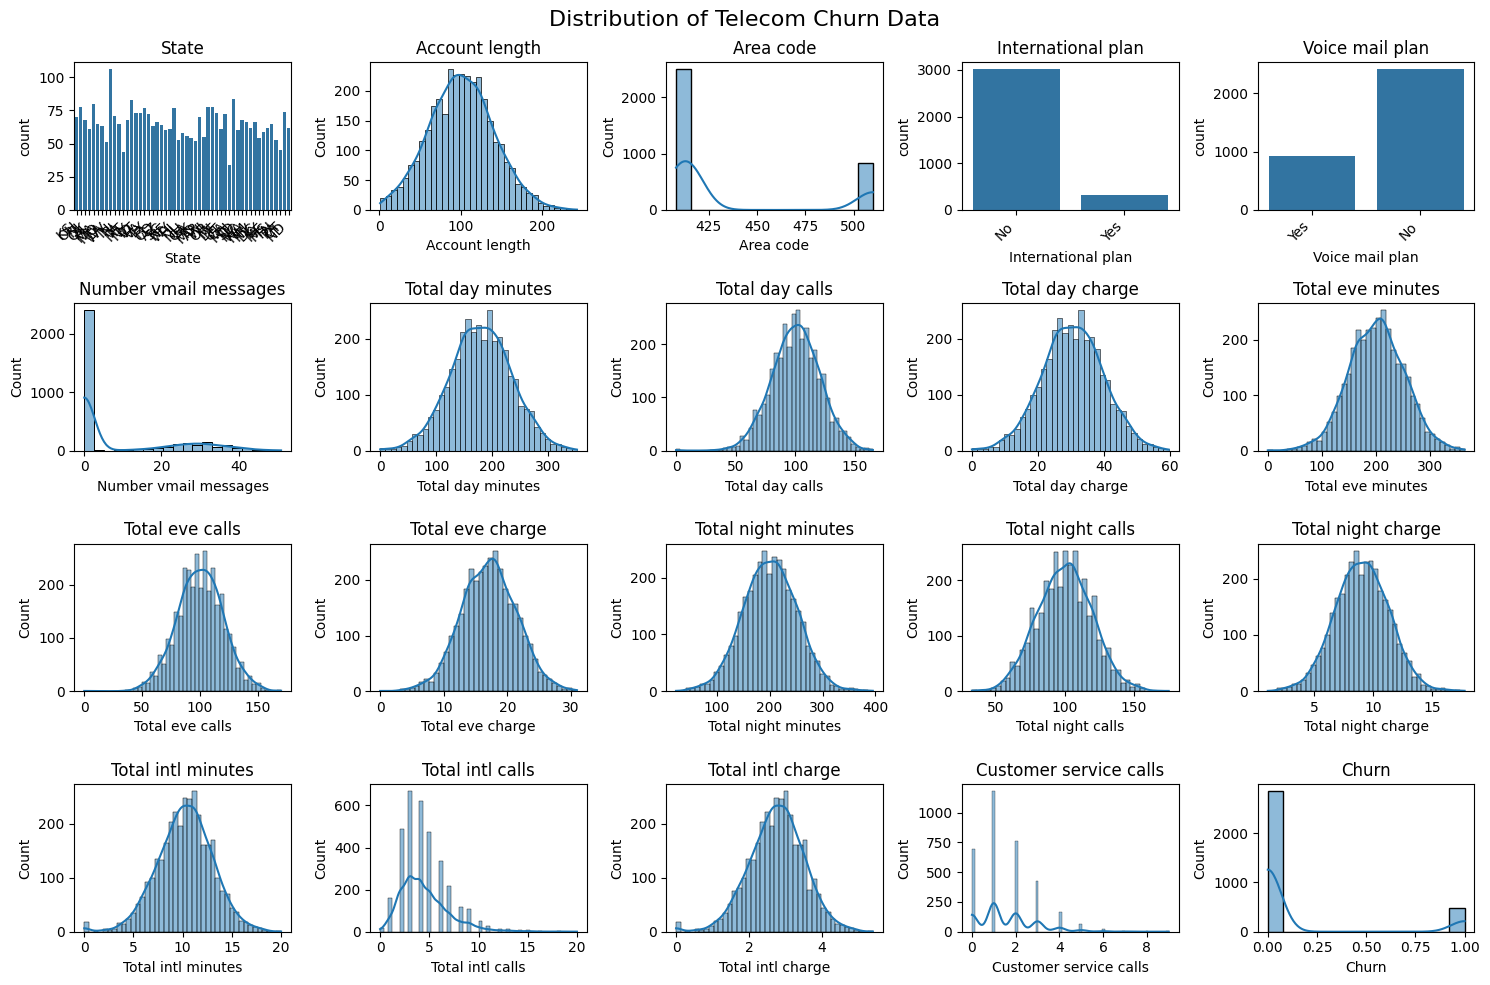

       Account length    Area code  Number vmail messages  Total day minutes  \
count     3333.000000  3333.000000            3333.000000        3333.000000   
mean       101.064806   437.182418               8.099010         179.775098   
std         39.822106    42.371290              13.688365          54.467389   
min          1.000000   408.000000               0.000000           0.000000   
25%         74.000000   408.000000               0.000000         143.700000   
50%        101.000000   415.000000               0.000000         179.400000   
75%        127.000000   510.000000              20.000000         216.400000   
max        243.000000   510.000000              51.000000         350.800000   

       Total day calls  Total day charge  Total eve minutes  Total eve calls  \
count      3333.000000       3333.000000        3333.000000      3333.000000   
mean        100.435644         30.562307         200.980348       100.114311   
std          20.069084          9.25943

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read the data
df = pd.read_csv('../src/data/telecom_churn.csv')

# Set up the matplotlib figure
plt.figure(figsize=(15, 10))

# Loop through each column and create a subplot
for i, col in enumerate(df.columns):
    plt.subplot(4, 5, i+1)
    
    if df[col].dtype == 'object':
        # For categorical variables
        sns.countplot(data=df, x=col)
        plt.xticks(rotation=45, ha='right')
    else:
        # For numerical variables
        sns.histplot(data=df, x=col, kde=True)
    
    plt.title(col)
    plt.tight_layout()

plt.suptitle('Distribution of Telecom Churn Data', fontsize=16)
plt.tight_layout()
plt.show()

# Print summary statistics
print(df.describe())

# Print info about the dataset
print(df.info())


# More on dataframe feature

In [2]:
for col in df.columns:
    print(f"{col}: {df[col].dtype}")

State: object
Account length: int64
Area code: int64
International plan: object
Voice mail plan: object
Number vmail messages: int64
Total day minutes: float64
Total day calls: int64
Total day charge: float64
Total eve minutes: float64
Total eve calls: int64
Total eve charge: float64
Total night minutes: float64
Total night calls: int64
Total night charge: float64
Total intl minutes: float64
Total intl calls: int64
Total intl charge: float64
Customer service calls: int64
Churn: bool


# Preprocess

In [4]:
data = df.copy()

In [5]:
# Encode categorical variables
data["Churn"] = data["Churn"].astype(int)
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
le = LabelEncoder()

# Encode 'State'
data['State'] = le.fit_transform(data['State'])

# Map 'Yes'/'No' to 1/0 in 'International plan' and 'Voice mail plan'
data['International plan'] = data['International plan'].map({'No': 0, 'Yes': 1})
data['Voice mail plan'] = data['Voice mail plan'].map({'No': 0, 'Yes': 1})


In [7]:
data["Churn"]

0       0
1       0
2       0
3       0
4       0
       ..
3328    0
3329    0
3330    0
3331    0
3332    0
Name: Churn, Length: 3333, dtype: int32

In [8]:
from sklearn.preprocessing import StandardScaler

numeric_cols = data.select_dtypes(include=['int64', 'float64', 'int32']).columns.tolist()
numeric_cols.remove('Churn')  # Exclude the target variable

scaler = StandardScaler()
data[numeric_cols] = scaler.fit_transform(data[numeric_cols])

In [9]:
corr_matrix = data.corr()

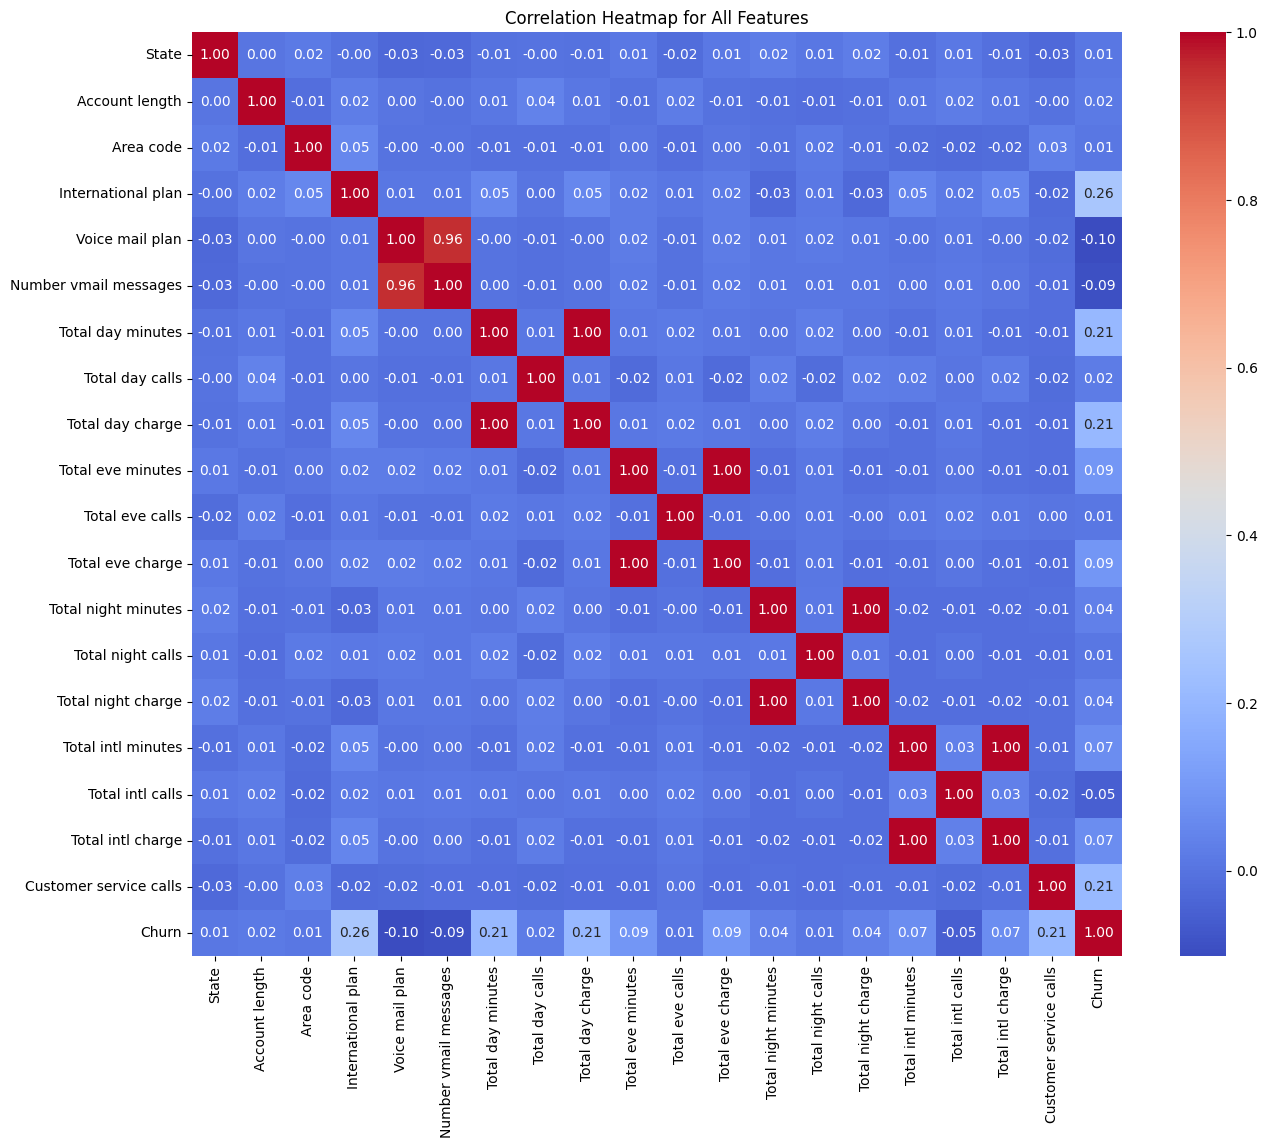

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 12))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap for All Features')
plt.show()


# Feature importance using ML Models

## With Random Forest

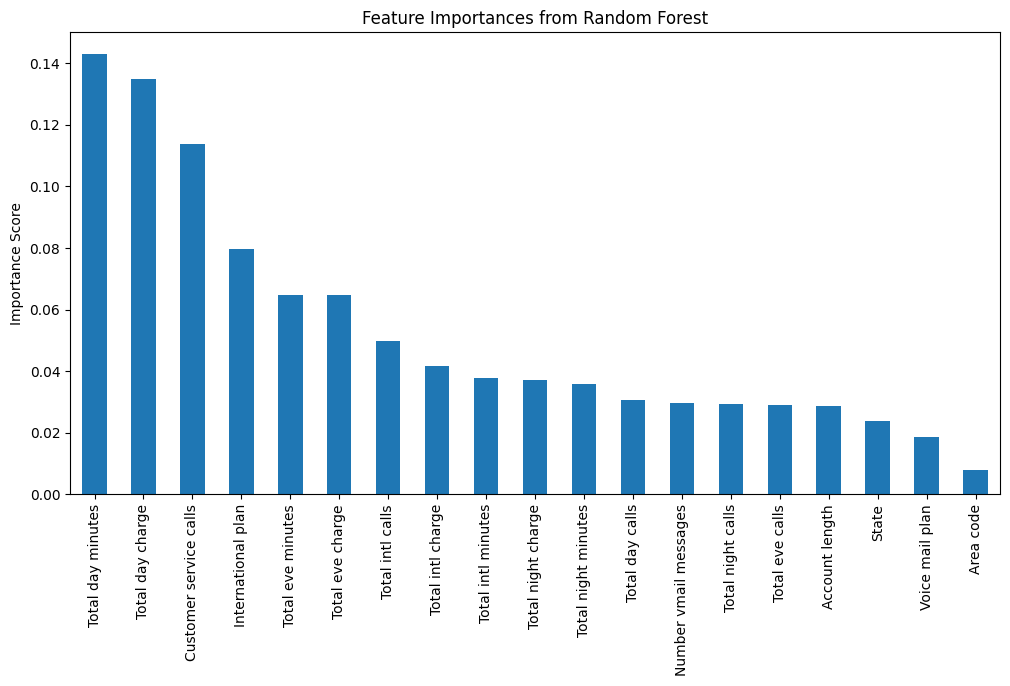

In [11]:
from sklearn.ensemble import RandomForestClassifier

# Separate features and target
X = data.drop('Churn', axis=1)
y = data['Churn']

# Train the model
model = RandomForestClassifier(random_state=42)
model.fit(X, y)

# Get feature importances
importances = pd.Series(model.feature_importances_, index=X.columns)
importances.sort_values(ascending=False, inplace=True)

# Plot feature importances
plt.figure(figsize=(12, 6))
importances.plot(kind='bar')
plt.title('Feature Importances from Random Forest')
plt.ylabel('Importance Score')
plt.show()


## With Logistic Regression

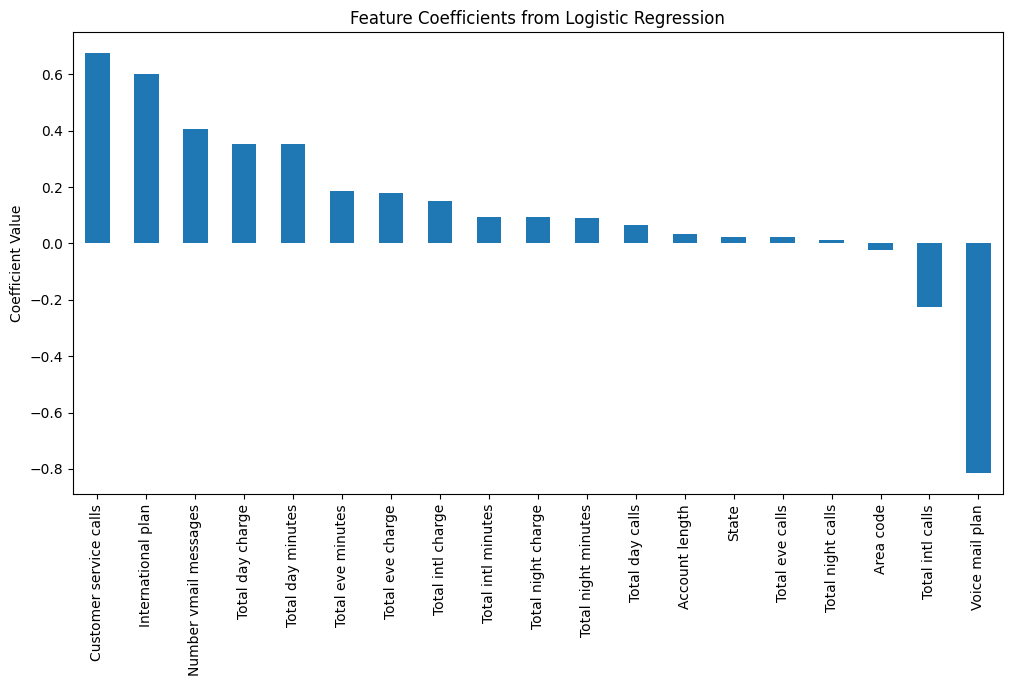

In [12]:
from sklearn.linear_model import LogisticRegression

log_model = LogisticRegression(max_iter=1000)
log_model.fit(X, y)

coefficients = pd.Series(log_model.coef_[0], index=X.columns)
coefficients.sort_values(ascending=False, inplace=True)

# Plot coefficients
plt.figure(figsize=(12, 6))
coefficients.plot(kind='bar')
plt.title('Feature Coefficients from Logistic Regression')
plt.ylabel('Coefficient Value')
plt.show()


In [14]:
from sklearn.feature_selection import f_classif

f_scores = f_classif(X, y)
f_scores_df = pd.DataFrame({'Feature': X.columns, 'F Score': f_scores[0], 'p-value': f_scores[1]})
f_scores_df.sort_values(by='F Score', ascending=False, inplace=True)

print(f_scores_df)


                   Feature     F Score       p-value
3       International plan  241.206004  1.433606e-52
18  Customer service calls  151.767013  3.900360e-34
6        Total day minutes  146.350785  5.300278e-33
8         Total day charge  146.350657  5.300606e-33
4          Voice mail plan   35.122944  3.411037e-09
9        Total eve minutes   28.932577  8.011339e-08
11        Total eve charge   28.926444  8.036524e-08
5    Number vmail messages   27.035912  2.117522e-07
17       Total intl charge   15.592581  8.018754e-05
15      Total intl minutes   15.583468  8.057311e-05
16        Total intl calls    9.327945  2.274701e-03
14      Total night charge    4.202136  4.045122e-02
12     Total night minutes    4.201496  4.046648e-02
7          Total day calls    1.135412  2.867010e-01
1           Account length    0.911598  3.397600e-01
10         Total eve calls    0.283994  5.941306e-01
0                    State    0.201649  6.534227e-01
2                Area code    0.126986  7.2159